In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging


In [36]:
### Logging
# Set up logger
logging.basicConfig(filename='sales_eda.log', level=logging.INFO,
                    format='%(asctime)s:%(levelname)s:%(message)s')

In [37]:
import zipfile
import os

In [38]:
def unzip_file(zip_file_path, extract_to_folder):
    if not os.path.exists(extract_to_folder):
        os.makedirs(extract_to_folder)

    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to_folder)
        print(f"Extracted all files to: {extract_to_folder} Successfully")

zip_file_path = 'A:/10x/10Acadamy-Week-4/Data/rossmann-store-sales.zip' 
extract_to_folder = 'A:/10x/10Acadamy-Week-4/Data'

unzip_file(zip_file_path, extract_to_folder)

Extracted all files to: A:/10x/10Acadamy-Week-4/Data Successfully


### Loading The Data

In [41]:
train=pd.read_csv("A:/10x/10Acadamy-Week-4/Data/train.csv")
test=pd.read_csv("A:/10x/10Acadamy-Week-4/Data/test.csv")
store=pd.read_csv("A:/10x/10Acadamy-Week-4/Data/store.csv")


train_data=pd.merge(train, store, on='Store', how='left')
test_data=pd.merge(test,store,on='Store',how='left')

C:\Users\Admin\AppData\Local\Temp\ipykernel_18564\3015388952.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train=pd.read_csv("A:/10x/10Acadamy-Week-4/Data/train.csv")


In [7]:
train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [15]:
train_data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [42]:
train_data.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In [43]:
train_data.fillna(method='ffill', inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_18564\2009382148.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_data.fillna(method='ffill', inplace=True)


In [44]:
test_data.isnull().sum()

Id                               0
Store                            0
DayOfWeek                        0
Date                             0
Open                            11
Promo                            0
StateHoliday                     0
SchoolHoliday                    0
StoreType                        0
Assortment                       0
CompetitionDistance             96
CompetitionOpenSinceMonth    15216
CompetitionOpenSinceYear     15216
Promo2                           0
Promo2SinceWeek              17232
Promo2SinceYear              17232
PromoInterval                17232
dtype: int64

In [45]:
test_data.fillna(method='ffill', inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_18564\450309101.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_data.fillna(method='ffill', inplace=True)


### Performing EDA to uncover insights about purchasing behavior

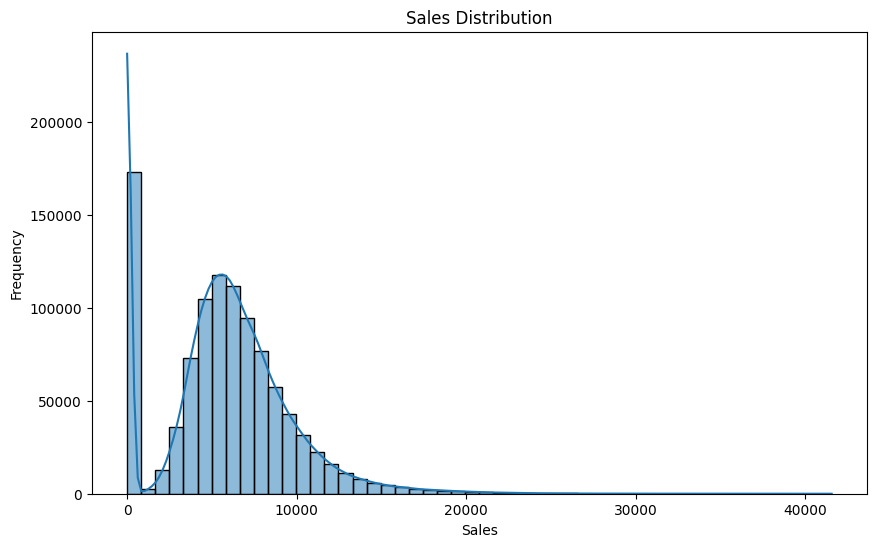

In [48]:
#Distribution of Sales:
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Sales'], bins=50, kde=True)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

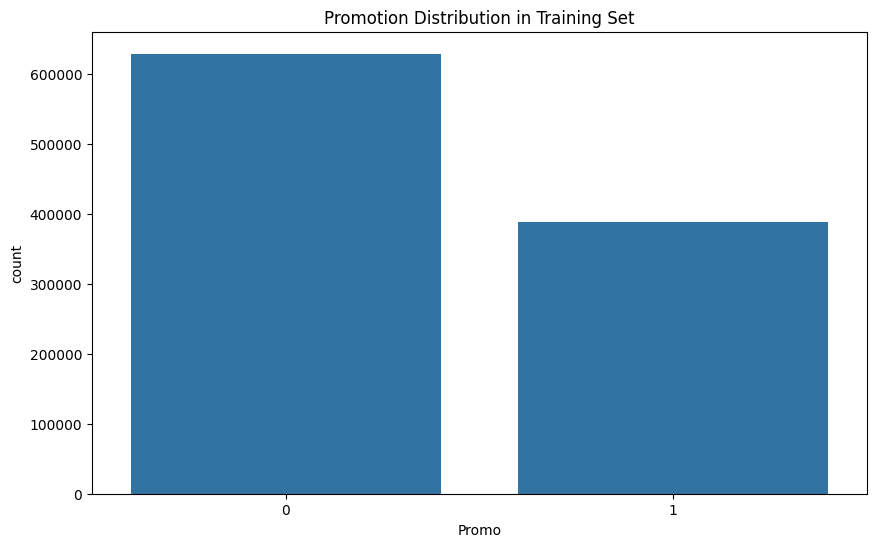

In [49]:
# Promotions distribution in training and test sets
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='Promo')
plt.title('Promotion Distribution in Training Set')
plt.show()

logging.info("Promo distribution plotted")




In [51]:
# a = public holiday, b = Easter holiday, c = Christmas, 0 = None, SO We have 4 Values in Description but we have 5 unique vale in our data set to over come this We will go with data Type conversion
train_data["StateHoliday"]=train_data["StateHoliday"].astype(str)

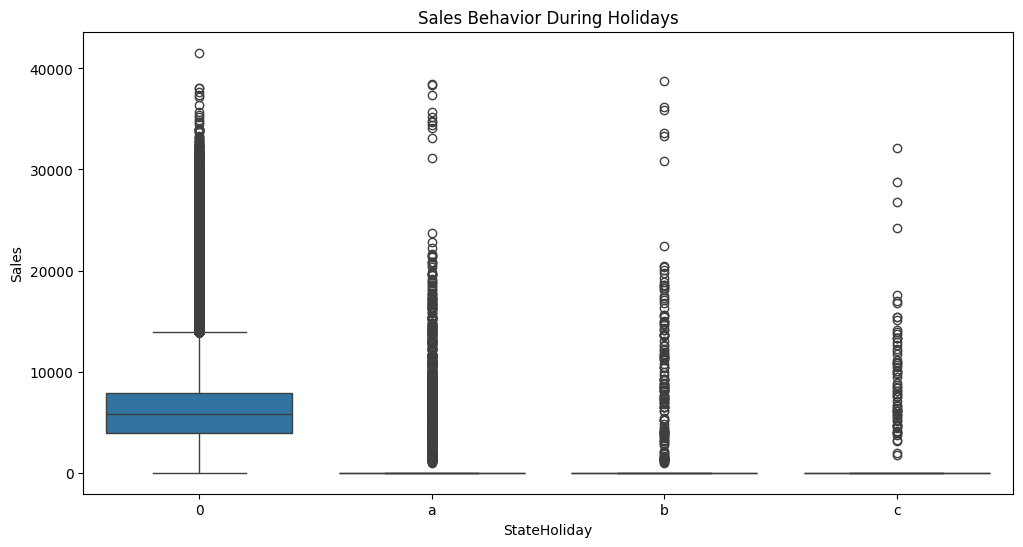

In [52]:
# Compare sales behavior before, during, and after holidays
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_data, x='StateHoliday', y='Sales')
plt.title('Sales Behavior During Holidays')
plt.show()

logging.info("Sales behavior during holidays plotted")

Seasonal Behavior (e.g., Christmas, Easter)
filtering the dataset for Christmas and Easter holidays and visualize their effect on sales.

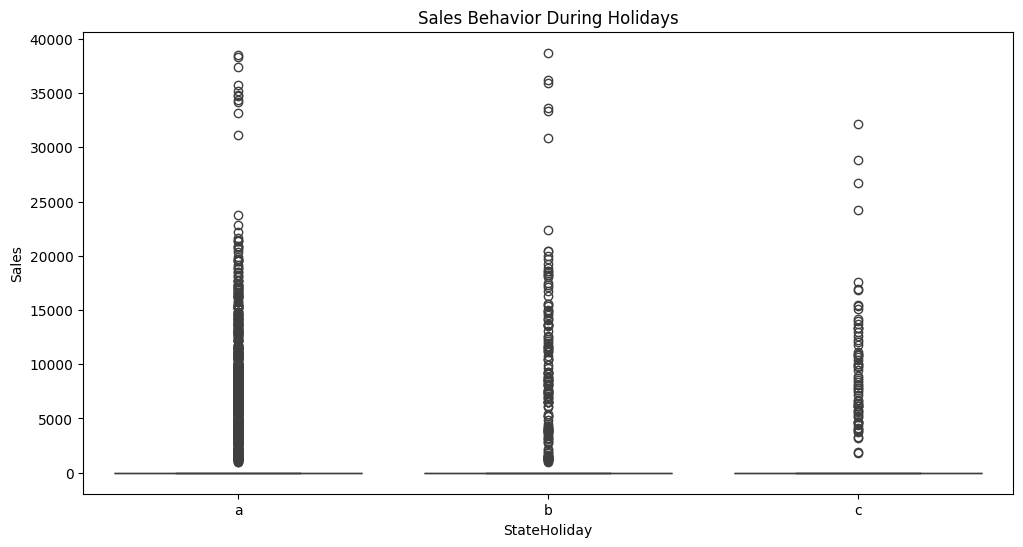

In [53]:
# Compare sales behavior before, during, and after holidays
data=train_data[train_data['StateHoliday']!='0']
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='StateHoliday', y='Sales')
plt.title('Sales Behavior During Holidays')
plt.show()

logging.info("Seasonal Behavior during holidays plotted")

In [55]:
# Extract month and year from the Date column
train_data['Month'] = pd.to_datetime(train_data['Date']).dt.month
train_data['Year'] = pd.to_datetime(train_data['Date']).dt.year



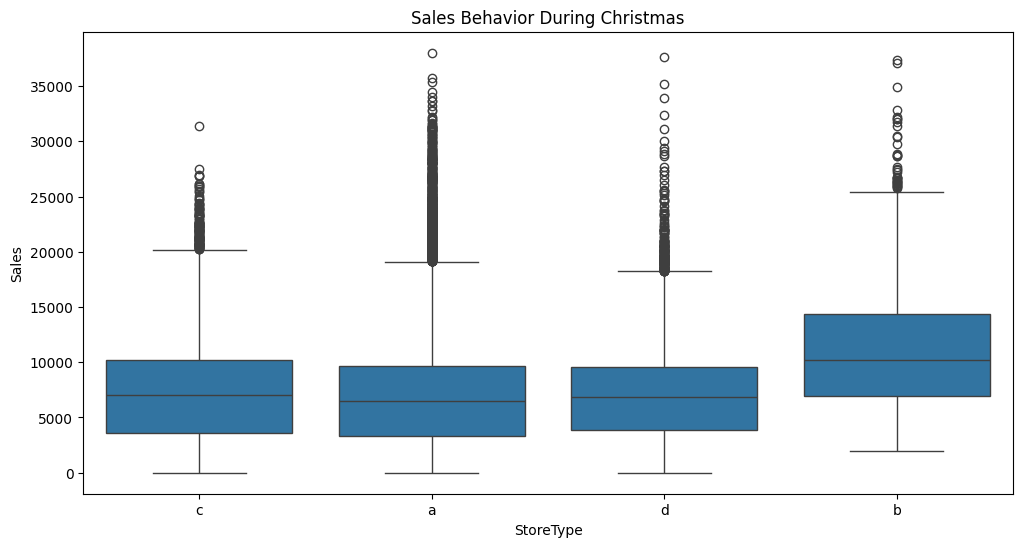

In [56]:
# Plot sales during Christmas (December)
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_data[train_data['Month'] == 12], x='StoreType', y='Sales')
plt.title('Sales Behavior During Christmas')
plt.show()

logging.info("Sales during Christmas plotted")

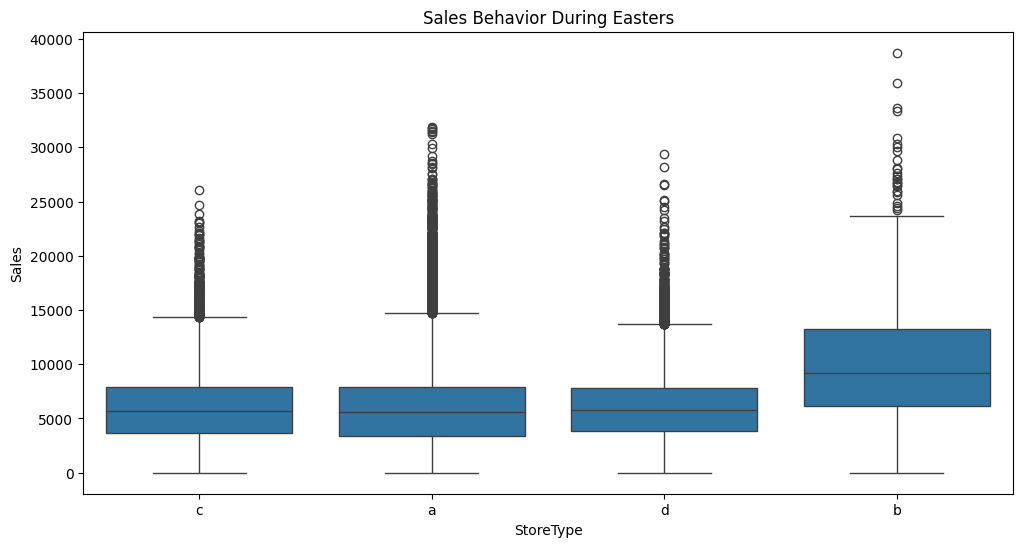

In [64]:
# Plot sales during Christmas (December)
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_data[train_data['Month'] == 4], x='StoreType', y='Sales')
plt.title('Sales Behavior During Easters')
plt.show()

logging.info("Sales during Easters plotted")

Correlation Between Sales and Number of Customer

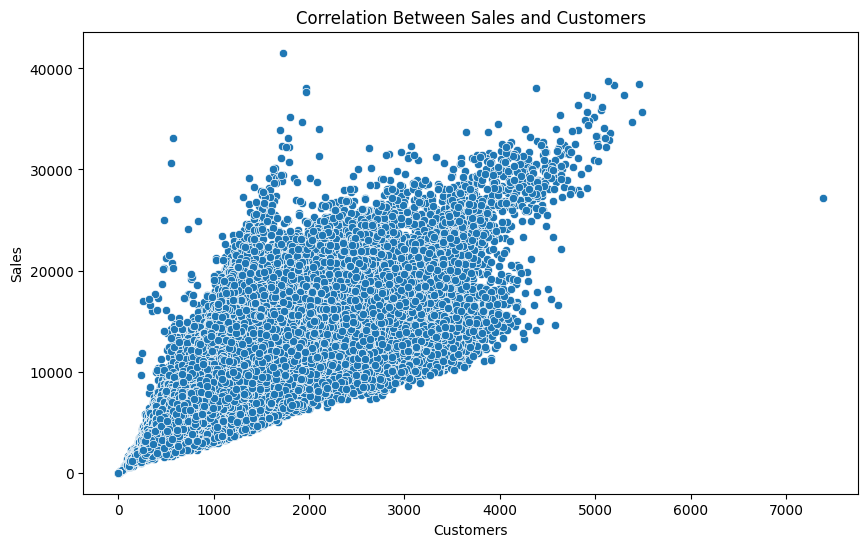

In [57]:
# Correlation between Sales and Customers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_data, x='Customers', y='Sales')
plt.title('Correlation Between Sales and Customers')
plt.show()

logging.info("Correlation between sales and customers plotted")


Impact Of Promotion Sales on Customer

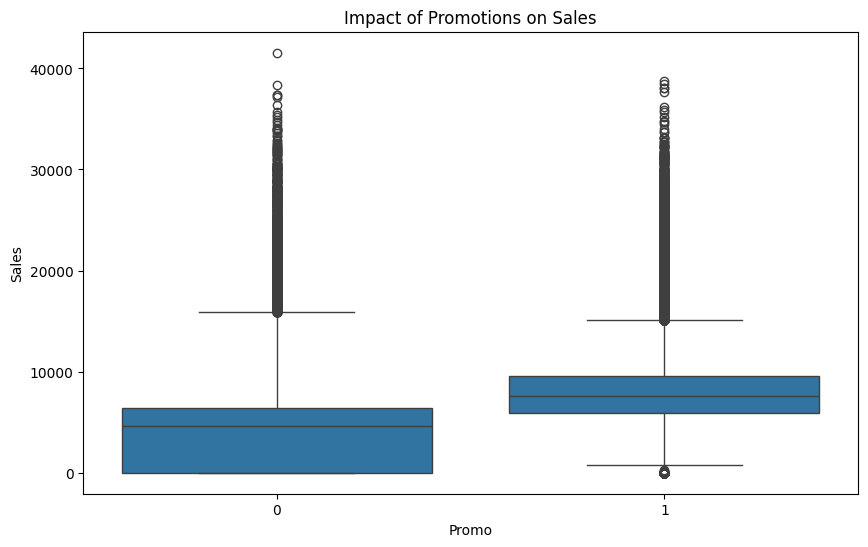

In [58]:
# Promo impact on sales
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data, x='Promo', y='Sales')
plt.title('Impact of Promotions on Sales')
plt.show()



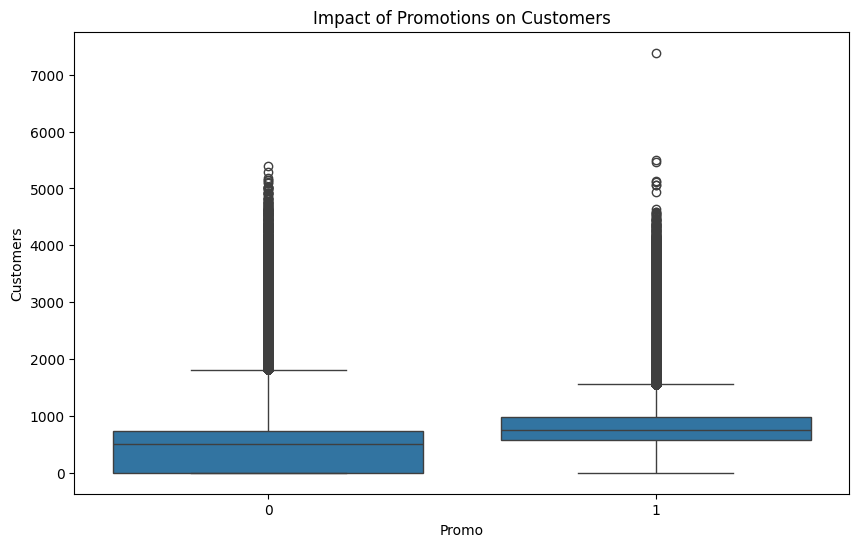

In [63]:

# Promo impact on customer count
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data, x='Promo', y='Customers')
plt.title('Impact of Promotions on Customers')
plt.show()

logging.info("Impact of promos on sales and customers plotted")

Store Assesment Sales

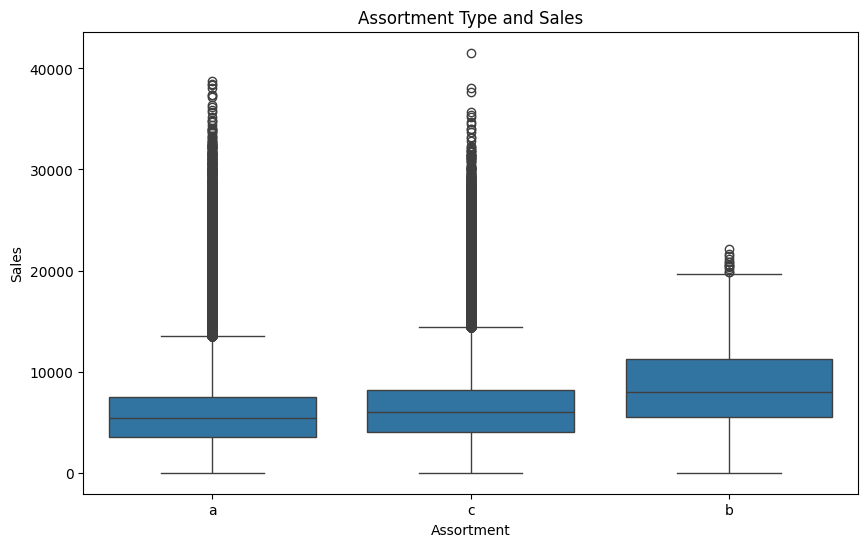

In [61]:
# Assortment and Sales
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data, x='Assortment', y='Sales')
plt.title('Assortment Type and Sales')
plt.show()

logging.info("Assortment and sales plotted")


## Doing With Both Test and Traning Data
##### 1. Promotions distribution in training and test sets

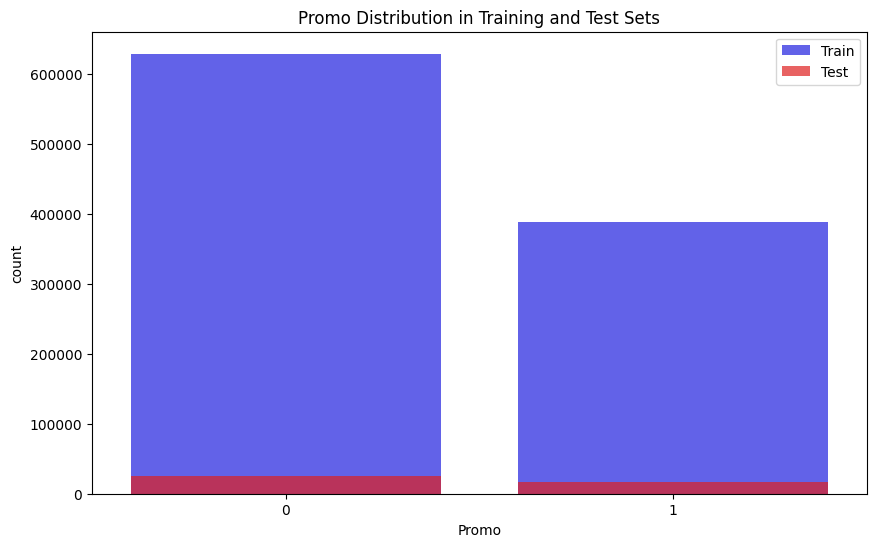

In [65]:

def compare_promo_distribution(train, test):
    plt.figure(figsize=(10,6))
    sns.countplot(data=train_data, x='Promo', label='Train', color='blue', alpha=0.7)
    sns.countplot(data=test_data, x='Promo', label='Test', color='red', alpha=0.7)
    plt.legend()
    plt.title('Promo Distribution in Training and Test Sets')
    plt.show()

compare_promo_distribution(train_data, test_data)

#### 2. Sales behavior during holidays

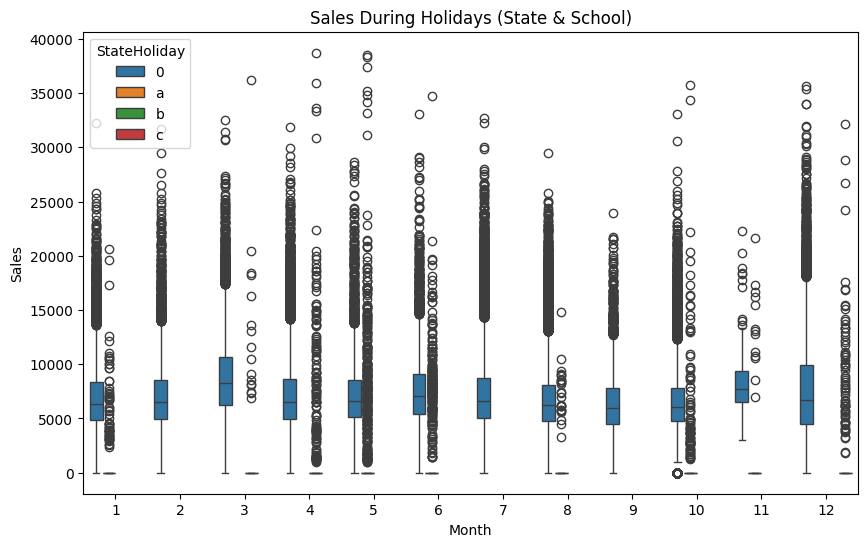

In [69]:

def compare_holiday_sales(train_data):
    train_data['Date'] = pd.to_datetime(train_data['Date'])
    train_data['Month'] = train_data['Date'].dt.month
    holiday_sales = train_data[(train_data['StateHoliday'] != '0') | (train_data['SchoolHoliday'] == 1)]
    
    plt.figure(figsize=(10,6))
    sns.boxplot(data=holiday_sales, x='Month', y='Sales', hue='StateHoliday')
    plt.title('Sales During Holidays (State & School)')
    plt.show()

compare_holiday_sales(train_data)